In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/soil-classification/soil_classification-2025/sample_submission.csv
/kaggle/input/soil-classification/soil_classification-2025/train_labels.csv
/kaggle/input/soil-classification/soil_classification-2025/test_ids.csv
/kaggle/input/soil-classification/soil_classification-2025/test/img_0f035b97.jpg
/kaggle/input/soil-classification/soil_classification-2025/test/img_f13af256.jpg
/kaggle/input/soil-classification/soil_classification-2025/test/img_15b41dbc.jpg
/kaggle/input/soil-classification/soil_classification-2025/test/img_cfb4fc7a.jpg
/kaggle/input/soil-classification/soil_classification-2025/test/img_683111fb.jpg
/kaggle/input/soil-classification/soil_classification-2025/test/img_c4bd7b3e.jpg
/kaggle/input/soil-classification/soil_classification-2025/test/img_4ccce0f8.jpg
/kaggle/input/soil-classification/soil_classification-2025/test/img_86faa98d.jpg
/kaggle/input/soil-classification/soil_classification-2025/test/img_c448342c.jpg
/kaggle/input/soil-classification/soil_cla

# Dataset Structure

In [2]:
import os

dataset_path = '/kaggle/input/soil-classification/soil_classification-2025'
print("📁 Dataset Directory (Level 1 Tree):")

# List immediate contents of the dataset path
for item in os.listdir(dataset_path):
    item_path = os.path.join(dataset_path, item)
    if os.path.isdir(item_path):
        print(f"├── 📂 {item}/")
    else:
        print(f"├── 📄 {item}")


📁 Dataset Directory (Level 1 Tree):
├── 📄 sample_submission.csv
├── 📄 train_labels.csv
├── 📂 test/
├── 📄 test_ids.csv
├── 📂 train/


In [3]:
import pandas as pd

csv_path = os.path.join(dataset_path, 'train_labels.csv')
train_labels = pd.read_csv(csv_path)
print("First few rows of train_labels.csv:")
print(train_labels.head())


First few rows of train_labels.csv:
           image_id      soil_type
0  img_ed005410.jpg  Alluvial soil
1  img_0c5ecd2a.jpg  Alluvial soil
2  img_ed713bb5.jpg  Alluvial soil
3  img_12c58874.jpg  Alluvial soil
4  img_eff357af.jpg  Alluvial soil


# Exploring the Data (EDA)

Using basic EDA techniques to get an overview of the data

In [4]:
import pandas as pd

# Corrected path
LABEL_PATH = "/kaggle/input/soil-classification/soil_classification-2025/train_labels.csv"

df = pd.read_csv(LABEL_PATH)
print(df.head())
print("Missing values:", df.isnull().sum().sum())
print("Unique classes:", df['soil_type'].nunique())
print("Label distribution:\n", df['soil_type'].value_counts())


           image_id      soil_type
0  img_ed005410.jpg  Alluvial soil
1  img_0c5ecd2a.jpg  Alluvial soil
2  img_ed713bb5.jpg  Alluvial soil
3  img_12c58874.jpg  Alluvial soil
4  img_eff357af.jpg  Alluvial soil
Missing values: 0
Unique classes: 4
Label distribution:
 soil_type
Alluvial soil    528
Red soil         264
Black Soil       231
Clay soil        199
Name: count, dtype: int64


Data Shape: (1222, 2)

First few rows:
            image_id      soil_type
0  img_ed005410.jpg  Alluvial soil
1  img_0c5ecd2a.jpg  Alluvial soil
2  img_ed713bb5.jpg  Alluvial soil
3  img_12c58874.jpg  Alluvial soil
4  img_eff357af.jpg  Alluvial soil

Missing values:
 image_id     0
soil_type    0
dtype: int64

Unique classes: 4

Class Distribution:
 soil_type
Alluvial soil    528
Red soil         264
Black Soil       231
Clay soil        199
Name: count, dtype: int64


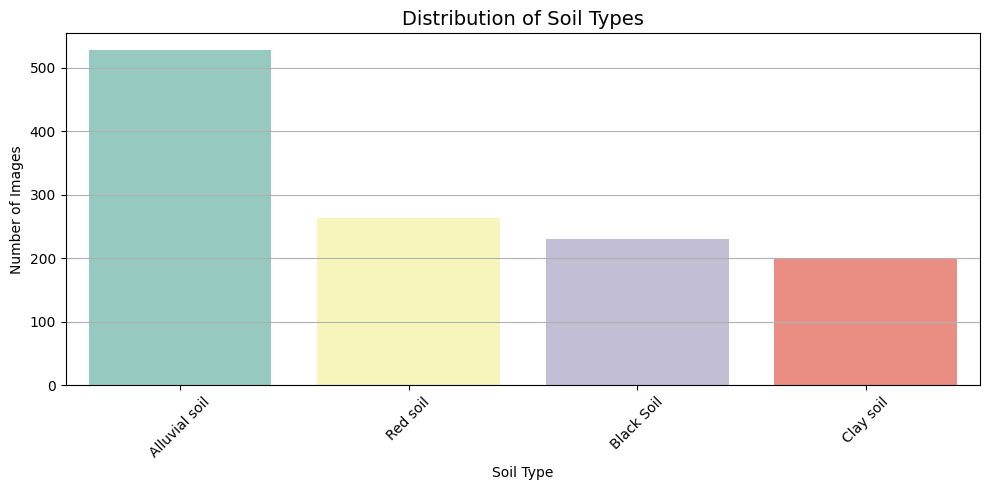

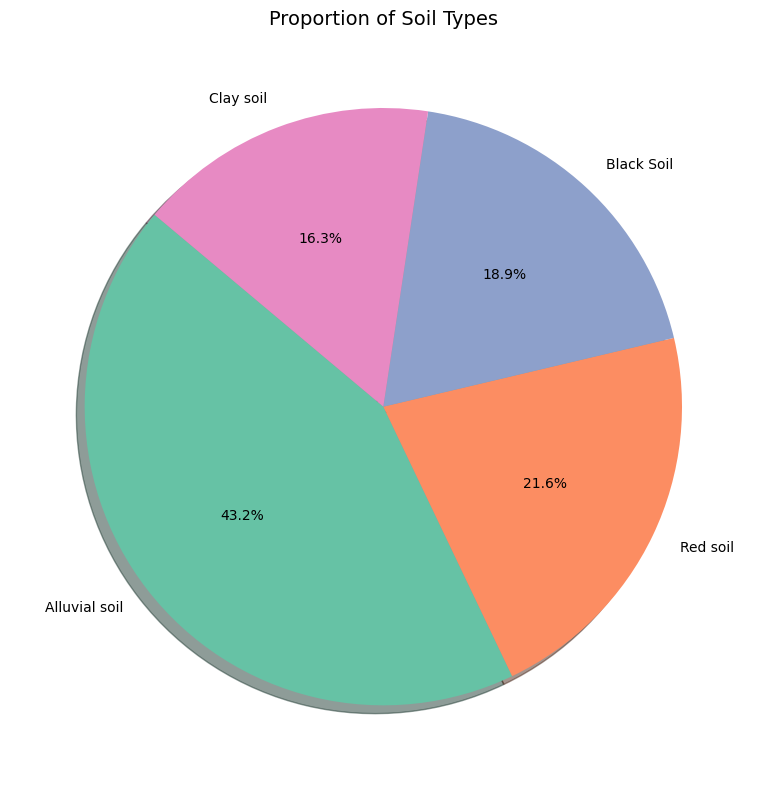

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("/kaggle/input/soil-classification/soil_classification-2025/train_labels.csv")

# Basic info
print("Data Shape:", df.shape)
print("\nFirst few rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())
print("\nUnique classes:", df["soil_type"].nunique())
print("\nClass Distribution:\n", df["soil_type"].value_counts())

# Bar Plot: Class Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x="soil_type", data=df, order=df["soil_type"].value_counts().index, palette="Set3")
plt.title("Distribution of Soil Types", fontsize=14)
plt.xlabel("Soil Type")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Pie Chart: Class Proportion
plt.figure(figsize=(8, 8))
df["soil_type"].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"), shadow=True
)
plt.ylabel("")
plt.title("Proportion of Soil Types", fontsize=14)
plt.tight_layout()
plt.show()


# Preprocessing

## Label Encoding

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/kaggle/input/soil-classification/soil_classification-2025/train_labels.csv')

# Check unique soil types
print(df['soil_type'].unique())

# Encode soil_type to numerical labels
le = LabelEncoder()
df['soil_type_encoded'] = le.fit_transform(df['soil_type'])

print(df.head())
print("Classes:", le.classes_)


['Alluvial soil' 'Clay soil' 'Red soil' 'Black Soil']
           image_id      soil_type  soil_type_encoded
0  img_ed005410.jpg  Alluvial soil                  0
1  img_0c5ecd2a.jpg  Alluvial soil                  0
2  img_ed713bb5.jpg  Alluvial soil                  0
3  img_12c58874.jpg  Alluvial soil                  0
4  img_eff357af.jpg  Alluvial soil                  0
Classes: ['Alluvial soil' 'Black Soil' 'Clay soil' 'Red soil']


In [7]:
import pickle
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

# Training Pipeline


*We built a soil classification pipeline using EfficientNet-B3, a state-of-the-art CNN known for its excellent accuracy-to-efficiency trade-off. We chose this model because it’s lightweight yet powerful, making it ideal for fine-tuning on smaller datasets — a scenario common in few-shot learning. Since we don’t have thousands of images per class, transfer learning is key: we froze most layers and only fine-tuned the last two blocks, allowing the model to retain general visual knowledge while adapting to soil-specific patterns. This helps us generalize better from limited data, avoiding overfitting and boosting real-world performance.*

In [8]:
import os
import gc
import copy
import numpy as np
import pandas as pd
from PIL import Image

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from tqdm import tqdm
import timm  

# -------------------- Dataset --------------------
class SoilDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        image = Image.open(row["image_path"]).convert("RGB")
        label = row["label"]
        if self.transform:
            image = self.transform(image)
        return image, label

# -------------------- Model --------------------
class SoilClassifier(nn.Module):
    def __init__(self, num_classes):
        super(SoilClassifier, self).__init__()
        self.backbone = timm.create_model('efficientnet_b3', pretrained=True)

        # Freeze all layers
        for param in self.backbone.parameters():
            param.requires_grad = False

        # Unfreeze last 2 blocks
        for param in self.backbone.blocks[-2:].parameters():
            param.requires_grad = True

        # Replace classifier head
        in_features = self.backbone.classifier.in_features
        self.backbone.classifier = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        return self.backbone(x)

# -------------------- Train Loop --------------------
def train_one_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    losses, all_preds, all_labels = [], [], []

    for images, labels in tqdm(dataloader, desc="Training", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
        all_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average="weighted")
    return np.mean(losses), acc, f1

# -------------------- Eval Loop --------------------
def evaluate(model, dataloader, criterion, device):
    model.eval()
    losses, all_preds, all_labels = [], [], []

    with torch.no_grad():
        for images, labels in tqdm(dataloader, desc="Evaluating", leave=False):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            losses.append(loss.item())
            all_preds.extend(torch.argmax(outputs, dim=1).cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average="weighted")
    return np.mean(losses), acc, f1

# -------------------- K-Fold Training --------------------
def train_kfold(df, num_classes, device, k=5, num_epochs=10, batch_size=32):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    transform = transforms.Compose([
        transforms.Resize((300, 300)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

    best_f1 = 0
    best_model = None
    best_fold = -1
    best_epoch = -1

    for fold, (train_idx, val_idx) in enumerate(skf.split(df, df['label'])):
        print(f"\n🟢 Fold {fold + 1}/{k}")

        train_ds = SoilDataset(df.iloc[train_idx].reset_index(drop=True), transform)
        val_ds = SoilDataset(df.iloc[val_idx].reset_index(drop=True), transform)

        train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

        model = SoilClassifier(num_classes).to(device)
        optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4)
        criterion = nn.CrossEntropyLoss()

        for epoch in range(num_epochs):
            print(f"🔁 Epoch {epoch + 1}/{num_epochs}")
            train_loss, train_acc, train_f1 = train_one_epoch(model, train_loader, optimizer, criterion, device)
            val_loss, val_acc, val_f1 = evaluate(model, val_loader, criterion, device)

            print(f"Train Loss: {train_loss:.4f} | Acc: {train_acc:.4f} | F1: {train_f1:.4f}")
            print(f"Val   Loss: {val_loss:.4f} | Acc: {val_acc:.4f} | F1: {val_f1:.4f}")

            if val_f1 > best_f1:
                best_f1 = val_f1
                best_model = copy.deepcopy(model)
                best_fold = fold + 1
                best_epoch = epoch + 1
                torch.save(best_model.state_dict(), "/kaggle/working/best_model_fold.pth")

        # 🔚 Cleanup
        del model
        gc.collect()
        torch.cuda.empty_cache()
        print(f"🧹 Freed GPU memory after fold {fold + 1}")

    print(f"\n🏆 Best Fold: {best_fold}, Epoch: {best_epoch}, F1: {best_f1:.4f}")
    return best_model

# -------------------- Prepare Data --------------------
def encode_labels(df):
    class_names = sorted(df['soil_type'].unique())
    label2id = {name: idx for idx, name in enumerate(class_names)}
    df['label'] = df['soil_type'].map(label2id)
    return df, label2id

# -------------------- Kickoff --------------------
if __name__ == "__main__":
    import matplotlib.pyplot as plt


    df = pd.read_csv("/kaggle/input/soil-classification/soil_classification-2025/train_labels.csv")
    df["image_path"] = df["image_id"].apply(lambda x: f"/kaggle/input/soil-classification/soil_classification-2025/train/{x}")
    df, label2id = encode_labels(df)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"🔧 Using device: {device}")

    best_model = train_kfold(df, num_classes=len(label2id), device=device)

    # save full model
    torch.save(best_model, "/kaggle/working/final_best_model.pt")


🔧 Using device: cuda

🟢 Fold 1/5


model.safetensors:   0%|          | 0.00/49.3M [00:00<?, ?B/s]

🔁 Epoch 1/10


Train Loss: 1.0354 | Acc: 0.6366 | F1: 0.6152
Val   Loss: 0.7776 | Acc: 0.8571 | F1: 0.8557
🔁 Epoch 2/10


Train Loss: 0.5126 | Acc: 0.8874 | F1: 0.8859
Val   Loss: 0.3232 | Acc: 0.9265 | F1: 0.9264
🔁 Epoch 3/10


Train Loss: 0.2207 | Acc: 0.9427 | F1: 0.9426
Val   Loss: 0.1950 | Acc: 0.9388 | F1: 0.9385
🔁 Epoch 4/10


Train Loss: 0.1272 | Acc: 0.9580 | F1: 0.9580
Val   Loss: 0.1333 | Acc: 0.9592 | F1: 0.9600
🔁 Epoch 5/10


Train Loss: 0.1011 | Acc: 0.9744 | F1: 0.9744
Val   Loss: 0.1352 | Acc: 0.9469 | F1: 0.9470
🔁 Epoch 6/10


Train Loss: 0.0753 | Acc: 0.9795 | F1: 0.9795
Val   Loss: 0.1194 | Acc: 0.9510 | F1: 0.9507
🔁 Epoch 7/10


Train Loss: 0.0540 | Acc: 0.9816 | F1: 0.9816
Val   Loss: 0.1066 | Acc: 0.9633 | F1: 0.9631
🔁 Epoch 8/10


Train Loss: 0.0605 | Acc: 0.9846 | F1: 0.9847
Val   Loss: 0.0943 | Acc: 0.9673 | F1: 0.9671
🔁 Epoch 9/10


Train Loss: 0.0438 | Acc: 0.9877 | F1: 0.9877
Val   Loss: 0.0760 | Acc: 0.9714 | F1: 0.9712
🔁 Epoch 10/10


Train Loss: 0.0354 | Acc: 0.9898 | F1: 0.9898
Val   Loss: 0.0812 | Acc: 0.9673 | F1: 0.9670
🧹 Freed GPU memory after fold 1

🟢 Fold 2/5
🔁 Epoch 1/10


Train Loss: 1.0518 | Acc: 0.5834 | F1: 0.5525
Val   Loss: 0.7734 | Acc: 0.8776 | F1: 0.8768
🔁 Epoch 2/10


Train Loss: 0.5289 | Acc: 0.8936 | F1: 0.8919
Val   Loss: 0.2928 | Acc: 0.9388 | F1: 0.9381
🔁 Epoch 3/10


Train Loss: 0.2284 | Acc: 0.9365 | F1: 0.9359
Val   Loss: 0.1584 | Acc: 0.9592 | F1: 0.9590
🔁 Epoch 4/10


Train Loss: 0.1451 | Acc: 0.9539 | F1: 0.9538
Val   Loss: 0.1461 | Acc: 0.9469 | F1: 0.9468
🔁 Epoch 5/10


Train Loss: 0.0956 | Acc: 0.9744 | F1: 0.9744
Val   Loss: 5.4423 | Acc: 0.9796 | F1: 0.9796
🔁 Epoch 6/10


Train Loss: 0.0840 | Acc: 0.9734 | F1: 0.9733
Val   Loss: 0.0688 | Acc: 0.9755 | F1: 0.9758
🔁 Epoch 7/10


Train Loss: 0.0602 | Acc: 0.9836 | F1: 0.9836
Val   Loss: 0.0645 | Acc: 0.9837 | F1: 0.9838
🔁 Epoch 8/10


Train Loss: 0.0413 | Acc: 0.9877 | F1: 0.9877
Val   Loss: 0.0512 | Acc: 0.9878 | F1: 0.9878
🔁 Epoch 9/10


Train Loss: 0.0475 | Acc: 0.9857 | F1: 0.9857
Val   Loss: 0.0543 | Acc: 0.9796 | F1: 0.9795
🔁 Epoch 10/10


Train Loss: 0.0290 | Acc: 0.9928 | F1: 0.9928
Val   Loss: 0.0735 | Acc: 0.9714 | F1: 0.9713
🧹 Freed GPU memory after fold 2

🟢 Fold 3/5
🔁 Epoch 1/10


Train Loss: 1.0222 | Acc: 0.6002 | F1: 0.5653
Val   Loss: 0.7733 | Acc: 0.8893 | F1: 0.8887
🔁 Epoch 2/10


Train Loss: 0.5146 | Acc: 0.8783 | F1: 0.8761
Val   Loss: 0.2951 | Acc: 0.9098 | F1: 0.9100
🔁 Epoch 3/10


Train Loss: 0.2021 | Acc: 0.9438 | F1: 0.9437
Val   Loss: 0.1826 | Acc: 0.9508 | F1: 0.9520
🔁 Epoch 4/10


Train Loss: 0.1215 | Acc: 0.9550 | F1: 0.9552
Val   Loss: 0.1251 | Acc: 0.9631 | F1: 0.9634
🔁 Epoch 5/10


Train Loss: 0.1165 | Acc: 0.9611 | F1: 0.9611
Val   Loss: 0.1308 | Acc: 0.9385 | F1: 0.9398
🔁 Epoch 6/10


Train Loss: 0.0670 | Acc: 0.9836 | F1: 0.9836
Val   Loss: 0.0970 | Acc: 0.9590 | F1: 0.9593
🔁 Epoch 7/10


Train Loss: 0.0439 | Acc: 0.9877 | F1: 0.9878
Val   Loss: 0.1349 | Acc: 0.9713 | F1: 0.9714
🔁 Epoch 8/10


Train Loss: 0.0470 | Acc: 0.9847 | F1: 0.9847
Val   Loss: 0.1193 | Acc: 0.9508 | F1: 0.9509
🔁 Epoch 9/10


Train Loss: 0.0567 | Acc: 0.9785 | F1: 0.9785
Val   Loss: 0.0611 | Acc: 0.9713 | F1: 0.9714
🔁 Epoch 10/10


Train Loss: 0.0245 | Acc: 0.9928 | F1: 0.9928
Val   Loss: 0.2055 | Acc: 0.9713 | F1: 0.9715
🧹 Freed GPU memory after fold 3

🟢 Fold 4/5
🔁 Epoch 1/10


Train Loss: 1.0306 | Acc: 0.6196 | F1: 0.5911
Val   Loss: 0.7336 | Acc: 0.8770 | F1: 0.8721
🔁 Epoch 2/10


Train Loss: 0.5102 | Acc: 0.8804 | F1: 0.8777
Val   Loss: 0.3208 | Acc: 0.9303 | F1: 0.9304
🔁 Epoch 3/10


Train Loss: 0.2116 | Acc: 0.9448 | F1: 0.9444
Val   Loss: 0.1385 | Acc: 0.9631 | F1: 0.9633
🔁 Epoch 4/10


Train Loss: 0.1426 | Acc: 0.9479 | F1: 0.9478
Val   Loss: 0.1070 | Acc: 0.9795 | F1: 0.9796
🔁 Epoch 5/10


Train Loss: 0.0949 | Acc: 0.9765 | F1: 0.9765
Val   Loss: 0.0855 | Acc: 0.9795 | F1: 0.9796
🔁 Epoch 6/10


Train Loss: 0.0633 | Acc: 0.9785 | F1: 0.9786
Val   Loss: 0.0798 | Acc: 0.9836 | F1: 0.9838
🔁 Epoch 7/10


Train Loss: 0.0720 | Acc: 0.9765 | F1: 0.9765
Val   Loss: 0.0916 | Acc: 0.9754 | F1: 0.9755
🔁 Epoch 8/10


Train Loss: 0.0464 | Acc: 0.9836 | F1: 0.9836
Val   Loss: 0.0853 | Acc: 0.9795 | F1: 0.9796
🔁 Epoch 9/10


Train Loss: 0.0324 | Acc: 0.9908 | F1: 0.9908
Val   Loss: 0.0670 | Acc: 0.9795 | F1: 0.9796
🔁 Epoch 10/10


Train Loss: 0.0310 | Acc: 0.9908 | F1: 0.9908
Val   Loss: 0.0678 | Acc: 0.9836 | F1: 0.9837
🧹 Freed GPU memory after fold 4

🟢 Fold 5/5
🔁 Epoch 1/10


Train Loss: 1.0513 | Acc: 0.5706 | F1: 0.5306
Val   Loss: 0.7290 | Acc: 0.8648 | F1: 0.8585
🔁 Epoch 2/10


Train Loss: 0.5431 | Acc: 0.8804 | F1: 0.8780
Val   Loss: 0.2580 | Acc: 0.9590 | F1: 0.9585
🔁 Epoch 3/10


Train Loss: 0.2315 | Acc: 0.9305 | F1: 0.9299
Val   Loss: 0.1070 | Acc: 0.9754 | F1: 0.9753
🔁 Epoch 4/10


Train Loss: 0.1168 | Acc: 0.9683 | F1: 0.9683
Val   Loss: 0.0594 | Acc: 0.9795 | F1: 0.9796
🔁 Epoch 5/10


Train Loss: 0.0795 | Acc: 0.9755 | F1: 0.9756
Val   Loss: 0.0505 | Acc: 0.9836 | F1: 0.9833
🔁 Epoch 6/10


Train Loss: 0.0603 | Acc: 0.9806 | F1: 0.9805
Val   Loss: 0.0292 | Acc: 0.9877 | F1: 0.9878
🔁 Epoch 7/10


Train Loss: 0.0567 | Acc: 0.9816 | F1: 0.9816
Val   Loss: 0.0201 | Acc: 0.9959 | F1: 0.9959
🔁 Epoch 8/10


Train Loss: 0.0387 | Acc: 0.9877 | F1: 0.9878
Val   Loss: 0.0319 | Acc: 0.9877 | F1: 0.9877
🔁 Epoch 9/10


Train Loss: 0.0513 | Acc: 0.9857 | F1: 0.9857
Val   Loss: 0.0202 | Acc: 0.9959 | F1: 0.9959
🔁 Epoch 10/10


Train Loss: 0.0358 | Acc: 0.9877 | F1: 0.9877
Val   Loss: 0.0217 | Acc: 0.9918 | F1: 0.9918
🧹 Freed GPU memory after fold 5

🏆 Best Fold: 5, Epoch: 9, F1: 0.9959


### Veriifying Label Order

In [9]:
import pandas as pd

def encode_labels(df):
    class_names = sorted(df['soil_type'].unique())
    label2id = {name: idx for idx, name in enumerate(class_names)}
    df['label'] = df['soil_type'].map(label2id)
    return df, label2id


train_csv_path = "/kaggle/input/soil-classification/soil_classification-2025/train_labels.csv"
df_train = pd.read_csv(train_csv_path)

# Encode labels
df_train, label2id = encode_labels(df_train)


print("Label mapping (soil_type -> label):")
for soil_type, label in label2id.items():
    print(f"{soil_type}: {label}")


Label mapping (soil_type -> label):
Alluvial soil: 0
Black Soil: 1
Clay soil: 2
Red soil: 3


# Validation


In [10]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, classification_report

import timm  # For efficientnet_b3 backbone

# --- Dataset ---
class SoilDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        image = Image.open(row["image_path"]).convert("RGB")
        label = row["label"]
        if self.transform:
            image = self.transform(image)
        return image, label

# --- Model ---
class SoilClassifier(nn.Module):
    def __init__(self, num_classes):
        super(SoilClassifier, self).__init__()
        self.backbone = timm.create_model('efficientnet_b3', pretrained=True)

        # Freeze all layers
        for param in self.backbone.parameters():
            param.requires_grad = False

        # Unfreeze last 2 blocks
        for param in self.backbone.blocks[-2:].parameters():
            param.requires_grad = True

        # Replace classifier head
        in_features = self.backbone.classifier.in_features
        self.backbone.classifier = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        return self.backbone(x)

# --- Transform ---
val_transform = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# --- Label encoding helper ---
def encode_labels(df):
    class_names = sorted(df['soil_type'].unique())
    label2id = {name: idx for idx, name in enumerate(class_names)}
    df['label'] = df['soil_type'].map(label2id)
    return df, label2id

# --- Updated Validation function with class names ---
def validate(model, dataloader, device, num_classes, class_names):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.numpy())

    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    f1_per_class = f1_score(all_labels, all_preds, average=None, labels=list(range(num_classes)))
    min_f1 = f1_per_class.min()

    print("\n--- Per-class F1 scores ---")
    for i, score in enumerate(f1_per_class):
        print(f"{class_names[i]}: F1 = {score:.4f}")
    print(f"\nMinimum F1 score (competition metric): {min_f1:.4f}")

    print("\nDetailed classification report:\n")
    print(classification_report(all_labels, all_preds, target_names=class_names, labels=list(range(num_classes))))

# --- Main script ---
if __name__ == "__main__":
    # Paths
    csv_path = "/kaggle/input/soil-classification/soil_classification-2025/train_labels.csv"  
    images_base_path = "/kaggle/input/soil-classification/soil_classification-2025/train/"

    # Load dataframe & encode labels
    df = pd.read_csv(csv_path)
    df["image_path"] = df["image_id"].apply(lambda x: f"{images_base_path}{x}")
    df, label2id = encode_labels(df)

    # Sort class names by label id
    class_names = sorted(label2id, key=lambda k: label2id[k])

    # Dataset and dataloader for validation
    val_dataset = SoilDataset(df, transform=val_transform)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    num_classes = len(label2id)

   
    checkpoint_path = "/kaggle/working/best_model_fold.pth"

   
    model = SoilClassifier(num_classes).to(device)
    model.load_state_dict(torch.load(checkpoint_path, map_location=device))


    validate(model, val_loader, device, num_classes, class_names)


Using device: cuda

--- Per-class F1 scores ---
Alluvial soil: F1 = 0.9943
Black Soil: F1 = 0.9892
Clay soil: F1 = 0.9925
Red soil: F1 = 1.0000

Minimum F1 score (competition metric): 0.9892

Detailed classification report:

               precision    recall  f1-score   support

Alluvial soil       0.99      0.99      0.99       528
   Black Soil       0.99      0.99      0.99       231
    Clay soil       0.99      0.99      0.99       199
     Red soil       1.00      1.00      1.00       264

     accuracy                           0.99      1222
    macro avg       0.99      0.99      0.99      1222
 weighted avg       0.99      0.99      0.99      1222



## Final Model Test

In [11]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, classification_report
import timm  

# --- Dataset ---
class SoilDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        image = Image.open(row["image_path"]).convert("RGB")
        label = row["label"]
        if self.transform:
            image = self.transform(image)
        return image, label

# --- Model ---
class SoilClassifier(nn.Module):
    def __init__(self, num_classes):
        super(SoilClassifier, self).__init__()
        self.backbone = timm.create_model('efficientnet_b3', pretrained=True)

        # Freeze all layers
        for param in self.backbone.parameters():
            param.requires_grad = False

        # Unfreeze last 2 blocks
        for param in self.backbone.blocks[-2:].parameters():
            param.requires_grad = True

        # Replace classifier head
        in_features = self.backbone.classifier.in_features
        self.backbone.classifier = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        return self.backbone(x)

# --- Transform ---
val_transform = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# --- Label encoding helper ---
def encode_labels(df):
    class_names = sorted(df['soil_type'].unique())
    label2id = {name: idx for idx, name in enumerate(class_names)}
    df['label'] = df['soil_type'].map(label2id)
    return df, label2id

# --- Validation function ---
def validate(model, dataloader, device, num_classes, class_names):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.numpy())

    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    f1_per_class = f1_score(all_labels, all_preds, average=None, labels=list(range(num_classes)))
    min_f1 = f1_per_class.min()

    print("\n--- Per-class F1 scores ---")
    for i, score in enumerate(f1_per_class):
        print(f"{class_names[i]}: F1 = {score:.4f}")
    print(f"\nMinimum F1 score (competition metric): {min_f1:.4f}")

    print("\nDetailed classification report:\n")
    print(classification_report(all_labels, all_preds, target_names=class_names, labels=list(range(num_classes))))

# --- Main ---
if __name__ == "__main__":
    # Paths 
    csv_path = "/kaggle/input/soil-classification/soil_classification-2025/train_labels.csv"  
    images_base_path = "/kaggle/input/soil-classification/soil_classification-2025/train/"

    # Load dataframe & encode labels
    df = pd.read_csv(csv_path)
    df["image_path"] = df["image_id"].apply(lambda x: f"{images_base_path}{x}")
    df, label2id = encode_labels(df)

    class_names = sorted(label2id, key=lambda k: label2id[k])
    num_classes = len(label2id)

    # Dataset & DataLoader
    val_dataset = SoilDataset(df, transform=val_transform)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

   
    checkpoint_path = "/kaggle/working/final_best_model.pt"
    model = torch.load(checkpoint_path, map_location=device, weights_only=False)
    model.to(device)

    # Validate
    validate(model, val_loader, device, num_classes, class_names)


Using device: cuda

--- Per-class F1 scores ---
Alluvial soil: F1 = 0.9943
Black Soil: F1 = 0.9892
Clay soil: F1 = 0.9925
Red soil: F1 = 1.0000

Minimum F1 score (competition metric): 0.9892

Detailed classification report:

               precision    recall  f1-score   support

Alluvial soil       0.99      0.99      0.99       528
   Black Soil       0.99      0.99      0.99       231
    Clay soil       0.99      0.99      0.99       199
     Red soil       1.00      1.00      1.00       264

     accuracy                           0.99      1222
    macro avg       0.99      0.99      0.99      1222
 weighted avg       0.99      0.99      0.99      1222



## Test Predictions

# Manual Label 

In [12]:
import torch
import pandas as pd
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import timm
import torch.nn as nn
import time

# --- Model class (must be same as training) ---
class SoilClassifier(nn.Module):
    def __init__(self, num_classes):
        super(SoilClassifier, self).__init__()
        self.backbone = timm.create_model('efficientnet_b3', pretrained=True)

        for param in self.backbone.parameters():
            param.requires_grad = False

        for param in self.backbone.blocks[-2:].parameters():
            param.requires_grad = True

        in_features = self.backbone.classifier.in_features
        self.backbone.classifier = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        return self.backbone(x)

# --- Dataset for test images ---
class TestDataset(Dataset):
    def __init__(self, df, image_folder, transform=None):
        self.df = df
        self.image_folder = image_folder
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_id = self.df.iloc[idx]['image_id']
        img_path = f"{self.image_folder}/{img_id}"
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, img_id

# --- Transform ---
test_transform = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# --- Main ---
if __name__ == "__main__":
    test_csv_path = "/kaggle/input/soil-classification/soil_classification-2025/test_ids.csv"
    test_image_folder = "/kaggle/input/soil-classification/soil_classification-2025/test"
    checkpoint_path = "/kaggle/working/final_best_model.pt"

    test_df = pd.read_csv(test_csv_path)

    soil_types = [
        "Alluvial soil",
        "Black Soil",
        "Clay soil",
        "Red soil"
    ]
    label2id = {name: i for i, name in enumerate(soil_types)}
    id2label = {i: name for name, i in label2id.items()}
    num_classes = len(soil_types)

    test_dataset = TestDataset(test_df, test_image_folder, transform=test_transform)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = torch.load(checkpoint_path, map_location=device, weights_only=False)
    model.to(device)
    model.eval()

    preds = []
    img_ids = []

    # --- Measure inference time ---
    start_time = time.time()

    with torch.no_grad():
        for images, image_ids in test_loader:
            images = images.to(device)
            outputs = model(images)
            predicted_classes = torch.argmax(outputs, dim=1).cpu().numpy()

            preds.extend(predicted_classes)
            img_ids.extend(image_ids)

    end_time = time.time()
    total_time = end_time - start_time
    avg_time_per_image = total_time / len(test_dataset)

    # Convert label indices to soil type strings
    predicted_soil_types = [id2label[p] for p in preds]

    submission_df = pd.DataFrame({
        "image_id": img_ids,
        "soil_type": predicted_soil_types
    })

    submission_df.to_csv("submission.csv", index=False)
    print("✅ Submission CSV created successfully!")
    print(f"⏱️ Total inference time: {total_time:.2f} seconds")
    print(f"📸 Avg inference time per image: {avg_time_per_image:.4f} seconds")


✅ Submission CSV created successfully!
⏱️ Total inference time: 3.51 seconds
📸 Avg inference time per image: 0.0103 seconds


## Label Encoded to test label integrity

In [13]:
import torch
import pandas as pd
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import timm
import torch.nn as nn
import pickle

# --- Model class (same as training) ---
class SoilClassifier(nn.Module):
    def __init__(self, num_classes):
        super(SoilClassifier, self).__init__()
        self.backbone = timm.create_model('efficientnet_b3', pretrained=True)

        # Freeze all layers
        for param in self.backbone.parameters():
            param.requires_grad = False

        # Unfreeze last 2 blocks
        for param in self.backbone.blocks[-2:].parameters():
            param.requires_grad = True

        # Replace classifier head
        in_features = self.backbone.classifier.in_features
        self.backbone.classifier = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        return self.backbone(x)
# --- Dataset ---
class TestDataset(Dataset):
    def __init__(self, df, image_folder, transform=None):
        self.df = df
        self.image_folder = image_folder
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_id = self.df.iloc[idx]['image_id']
        img_path = f"{self.image_folder}/{img_id}"
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, img_id

# --- Transform ---
test_transform = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# --- Main ---
if __name__ == "__main__":
    test_csv_path = "/kaggle/input/soil-classification/soil_classification-2025/test_ids.csv"
    test_image_folder = "/kaggle/input/soil-classification/soil_classification-2025/test"
    checkpoint_path = "/kaggle/working/final_best_model.pt"
    label_encoder_path = "/kaggle/working/label_encoder.pkl"

    # Load LabelEncoder
    with open(label_encoder_path, "rb") as f:
        le = pickle.load(f)

    # Prepare id2label map
    id2label = {i: label for i, label in enumerate(le.classes_)}
    num_classes = len(le.classes_)

    # Load test dataframe
    test_df = pd.read_csv(test_csv_path)

    # Prepare dataset & dataloader
    test_dataset = TestDataset(test_df, test_image_folder, transform=test_transform)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

    # Load model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = torch.load(checkpoint_path, map_location=device, weights_only=False)
    model.to(device)
    model.eval()

    preds = []
    img_ids = []

    with torch.no_grad():
        for images, image_ids in test_loader:
            images = images.to(device)
            outputs = model(images)
            predicted_classes = torch.argmax(outputs, dim=1).cpu().numpy()
            preds.extend(predicted_classes)
            img_ids.extend(image_ids)

    # Convert label IDs back to soil_type using the original LabelEncoder
    predicted_soil_types = le.inverse_transform(preds)

    # Build submission
    submission_df = pd.DataFrame({
        "image_id": img_ids,
        "soil_type": predicted_soil_types
    })

    submission_df.to_csv("submission_encoded.csv", index=False)
    print("✅ Submission CSV created using LabelEncoder!")


✅ Submission CSV created using LabelEncoder!


In [14]:
import pandas as pd

# Load both submission files
df_encoded = pd.read_csv("/kaggle/working/submission_encoded.csv")
df_manual = pd.read_csv("/kaggle/working/submission.csv")

# Sort both dataframes by image_id to ensure matching row order
df_encoded = df_encoded.sort_values("image_id").reset_index(drop=True)
df_manual = df_manual.sort_values("image_id").reset_index(drop=True)

# Check for differences
comparison = df_encoded["soil_type"] == df_manual["soil_type"]
mismatch_indices = comparison[~comparison].index

if len(mismatch_indices) == 0:
    print("✅ Both submission files are identical!")
else:
    print(f"❌ Found {len(mismatch_indices)} mismatches.")
    print("Here are a few examples:")
    for i in mismatch_indices[:5]:  # Show first 5 mismatches
        print(f"Row {i}: encoded={df_encoded.loc[i, 'soil_type']} | manual={df_manual.loc[i, 'soil_type']}")


✅ Both submission files are identical!
